# Riemann Sum Method to Calculate the Moment of Inertia

This is a tutorial on calculating the Riemann sum using the right side of the segments.

We first need to import some libraries for doing math and plotting graphs in Python.

In [132]:
import numpy as np # numpy is Python's numerical library; always import it
import scipy as sp # scipy is a scientific library; it has a few functions we'll need
from __future__ import division, print_function # good defensive measure
import matplotlib as mpl # a big library with plotting functionality
import matplotlib.pyplot as plt # a subset of matplotlib with most of the useful tools
# set figure size and font size for notebook
mpl.rcParams['figure.figsize'] = (15,10)
mpl.rcParams['font.size'] = 14
mpl.rcParams['legend.fontsize'] = 14

Let's define the equation for moment of inertia in one dimension. The equation is
$$I =\sum_i m_i r_i^2.$$
We will make it one dimensional.
$$I =\sum_i m_i x_i^2$$
Our next task is to break our one-dimensional object into segments of equal mass. We will assume that the density is constant. This means each equal segment mass is an equal length.
$$I =\Delta m \sum_i x_i^2$$
We will assume the object goes from $x = 0$ to $x = L$. When we break the object into segments, the position of the right side of a segment will be at
$$x = \frac{i}{n}L,$$
where $n$ is the number of segments. Our moment of inertia becomes
$$I = \Delta m \sum_i \left(\frac{i}{n}L\right)^2 = \Delta m \left(\left(\frac{1}{n}L\right)^2+\left(\frac{2}{n}L\right)^2+\left(\frac{3}{n}L\right)^2+ ... \left(\frac{n}{n}L\right)^2\right).$$
All of the terms have $L^2$. We can factor that out to get
$$I = \Delta m L^2 \left(\left(\frac{1}{n}\right)^2+\left(\frac{2}{n}\right)^2+\left(\frac{3}{n}\right)^2+ ... \left(\frac{n}{n}\right)^2\right).$$

Now, we know that $n \Delta m = M$. If we factor out an $n$ so that we write this in terms of the total mass, we will get
$$I = \frac{M}{n} L^2 \left(\left(\frac{1}{n}\right)^2+\left(\frac{2}{n}\right)^2+\left(\frac{3}{n}\right)^2+ ... \left(\frac{n}{n}\right)^2\right).$$
If we ignore the total mass and length for a moment, it becomes clear that we only need to calculate the fractions and square them. Then, we sum those fractions. Finally, we divide the sum by $n$.

This means we can make a function that calculates the square of a value. We will then pass the fractions to that function. Here's the function that computes the square of a value.

In [133]:
def inertia_rod(x):
    return x*x

Now, let's write another function that will calculate each of the fractions and pass it to this inertia function.

In [134]:
def Riemann(fname,n):

    #function:  Riemann(fname,a,b,n)

    #Description:  integrates function 'fname' from a to b using the 
    #right side endpoints with n samples

    #Inputs: 
        #fname   name of function to be integrated
        #n       number of intervals
        
    #Outputs:
        #I       a real number representing the value of the integral

    I = 0
    for ii in range(0, n+1, 1):#go to n+1 because it evaluates as ii < n+1
        I += fname(ii/n) #Each segment is located with its right side at ii/n * L

    I /= n
    return I

Make sure to test some cases where you know the result.

In [135]:
Riemann(inertia_rod,10)

0.385

Now, let's plot the Riemann sum against the number of segments to see if increasing the number of segments converges to some particulare Riemann sum.

0.33338338505338816


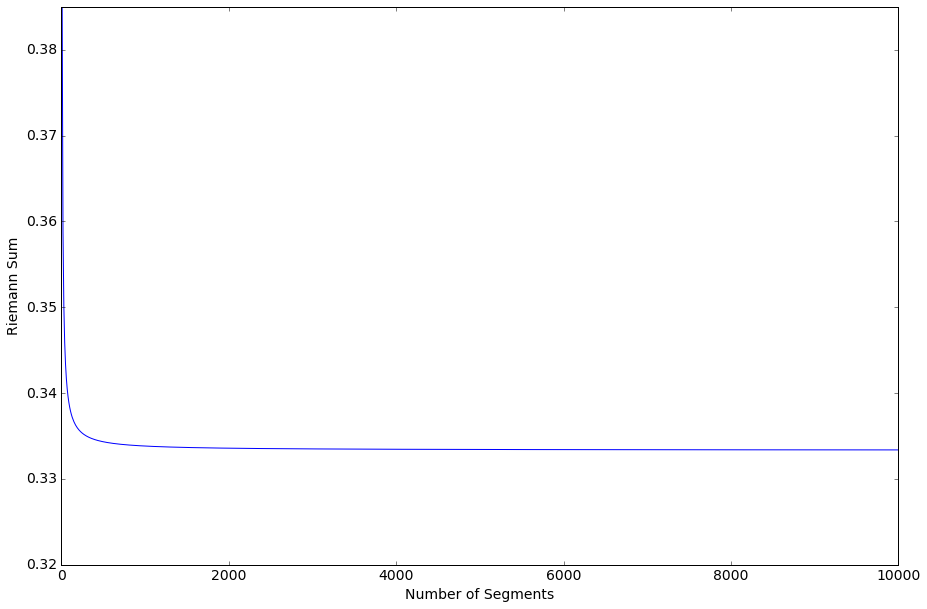

In [136]:
xx = np.array([]) #Make a list of x values (number of segments) where the Riemann sum is calculated
yy = np.array([]) #Make a list of y values (Riemann sum)
maxn = 10000 #Set the maximum number of segments to be calculated

for jj in range(10, maxn, 10): #Loop to calculate various numbers of segments from 10 to maxn in steps of 10
    tempx = jj #Create the x value
    tempy = Riemann(inertia, jj) #Calculate the y value
    xx = np.append(xx, tempx) #Insert the x value into the list at the end
    yy = np.append(yy, tempy) #Insert they y value into the list at the end

print (tempy) #Print the very last Riemann sum calculated with maxn segments
#Let's make a plot to see if there is a convergence as number of segments increases
plt.plot(xx, yy)
plt.ylabel('Riemann Sum')
plt.xlabel('Number of Segments')
plt.axis([0, maxn, 0.32, 0.385])
plt.show()

Okay, we get a convergence near $1/3$, which means our inertia must be $$I = \frac{ML^2}{3}.$$ Let's see if we can make this more generic so that we can place the origin $x = 0$ anywhere along the rod.

In [105]:
def Riemann2(fname,a,b,n):

    #function:  Riemann(fname,a,b,n)

    #Description:  integrates function 'fname' from a to b using the 
    #right side endpoints with n samples

    #Inputs: 
        #fname   name of function to be integrated
        #a       left hand endpoint
        #b       right hand endpoint
        #n       number of intervals
        
    #Outputs:
        #I       a real number representing the value of the integral

    I = 0
    h = (b-a)/n # this is the segment length
    ii = 0
    current_position = a
    while current_position <= b:
        current_position += h
        I += fname(current_position) #Each segment is located with its right side at ii/n * L

    I /= n
    return I

In [106]:
Riemann2(inertia_rod, -0.5,0.5,1000)

0.08333350000000012

0.08335837004938254


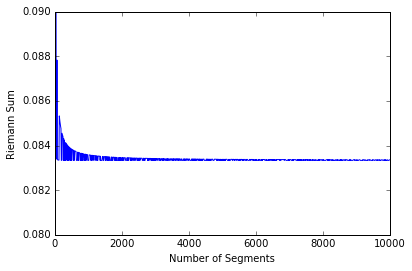

In [112]:
xx2 = np.array([]) #Make a list of x values (number of segments) where the Riemann sum is calculated
yy2 = np.array([]) #Make a list of y values (Riemann sum)
maxn = 10000 #Set the maximum number of segments to be calculated

for jj in range(10, maxn, 10): #Loop to calculate various numbers of segments from 10 to maxn in steps of 10
    tempx = jj #Create the x value
    tempy = Riemann2(inertia, -0.5, 0.5, jj) #Calculate the y value
    xx2 = np.append(xx2, tempx) #Insert the x value into the list at the end
    yy2 = np.append(yy2, tempy) #Insert they y value into the list at the end

print (tempy) #Print the very last Riemann sum calculated with maxn segments
#Let's make a plot to see if there is a convergence as number of segments increases
plt.plot(xx2, yy2)
plt.ylabel('Riemann Sum')
plt.xlabel('Number of Segments')
plt.axis([0, maxn, 0.08, 0.09])
plt.show()